[Audio Preprocessing](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)<br>
[librosa](https://medium.com/@patrickbfuller/librosa-a-python-audio-libary-60014eeaccfb)<br>
[link text](http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.mfcc.html)

In [ ]:
# Audio preprocessing
import librosa
## Signal represention graph
import librosa.display

import numpy as np
import matplotlib.pyplot as plt
## for the CNN modle
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [ ]:
# To mount the drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [ ]:
## Listout the files in the data folder
import os
os.listdir('/content/drive/My Drive/Courses Taken 2020/Summer Internship/AudioData')

['DC', 'Info.txt', 'JE', 'KL', 'JK']

In [ ]:
sample_file = '/content/drive/My Drive/Courses Taken 2020/Summer Internship/AudioData/DC/a01.wav'

In [ ]:
# Load the audio data with librosa from .wav file
# input path 
data, sampling_rate = librosa.load(sample_file)
# output is data teh discrete values, sampling rate

In [ ]:
## Audio sampled data ouput shape
data.shape

(80434,)

In [ ]:
# sampling rate
sampling_rate

22050

In [ ]:
## data
data[:10]

array([0.03537439, 0.05184603, 0.04569934, 0.04965753, 0.04663509,
       0.04879001, 0.04705136, 0.04866577, 0.04766231, 0.04865323],
      dtype=float32)

In [ ]:
print(type(data))

<class 'numpy.ndarray'>


In [ ]:
print(data.max())
print(data.min())
print(data.mean())

0.91246253
-1.0036622
0.04223855


Populating the interactive namespace from numpy and matplotlib


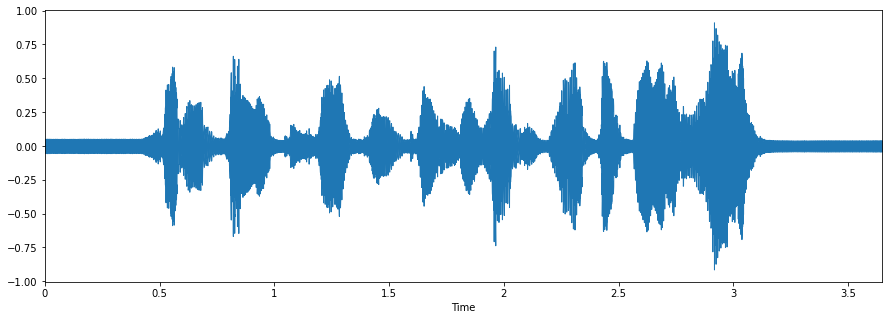

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
X, sample_rate = librosa.load(sample_file, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
X.shape

(110250,)

In [ ]:
10*22050*2

441000

In [ ]:
X[:-100]

array([0.08215332, 0.0809021 , 0.07754517, ..., 0.0402832 , 0.04049683,
       0.04067993], dtype=float32)

In [ ]:
librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

array([[-318.34907634, -289.72019185, -269.75849637, ..., -219.42767604,
        -209.46609287, -180.1187328 ],
       [  83.44985313,  135.30527971,  182.35460902, ...,  229.88559252,
         238.01667462,  248.71813002],
       [ -54.12408135,   -7.18993656,   16.98681678, ...,   -4.90131715,
          -0.33663499,   -1.15097019],
       ...,
       [ -11.183432  ,  -10.80955344,   -9.52499654, ...,  -32.88296871,
         -32.24869379,  -24.09375983],
       [ -10.36455051,  -15.87282497,  -20.11362012, ...,  -16.86774535,
         -12.20967621,  -13.46425284],
       [  -0.92029628,   -8.4874924 ,  -13.82025247, ...,    4.01767426,
           8.50465788,   10.81932434]])

In [ ]:
librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13).shape

(13, 216)

In [ ]:
np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0).shape

(216,)

In [ ]:
os.listdir(base_path)

['DC', 'Info.txt', 'JE', 'KL', 'JK']

In [ ]:
base_path = '/content/drive/My Drive/Courses Taken 2020/Summer Internship/AudioData'
folders = [fol  for fol in os.listdir(base_path) if os.path.isdir(base_path+'/'+fol)]
folders

['DC', 'JE', 'KL', 'JK']

In [ ]:
df = pd.DataFrame(columns=['feature']) # empty dataframe with a single column feature
bookmark=0 # Row count
for cls,per in enumerate(folders): # Folder name with label
  # labels are from 0 to 3
  print(cls,per)

  for name in os.listdir(base_path+'/'+per):
        X, sample_rate = librosa.load(base_path+'/'+per+'/'+name, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        # shape of x is sr*duration
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        # 216 values
        feature = mfccs
        # Appending class label to numpy array
        feature = np.append(feature,cls)
        # In each row we have a single column
        # In that column I have a numpy array as value
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

0 DC
1 JE
2 KL
3 JK


In [ ]:
# Top 5 rows
df.head()

,feature
0,"[-22.524902101459574, -22.20888749145798, -24...."
1,"[-5.186610461448468, -6.954901833569995, -8.51..."
2,"[-17.140371036763575, -12.269744525501487, -9...."
3,"[-13.442276774499996, -8.020598554877814, -5.9..."
4,"[-26.308570244098238, -24.952420640915427, -25..."


In [ ]:
df['feature'][0].shape

(217,)

In [ ]:
df['feature'][0][-1]

0.0

In [ ]:
df.shape

(480, 1)

In [ ]:
df.iloc[0][0].shape

(217,)

In [ ]:
df2 = pd.DataFrame(df['feature'].values.tolist())
df2.sample()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216
308,-18.004732,-19.842549,-23.641967,-23.839151,-23.334801,-24.146894,-24.223353,-24.207293,-24.933519,-25.270631,-26.308751,-25.500184,-23.975435,-23.854417,-22.827926,-22.968332,-23.412856,-23.741059,-24.192163,-24.27769,-24.961989,-23.818676,-23.752498,-24.1,-25.856992,-25.617683,-24.81142,-24.392661,-24.946983,-25.188451,-26.261412,-24.190969,-23.894941,-24.485374,-25.230861,-26.162921,-25.066719,-24.766667,-23.087464,-22.103977,...,-32.130049,-34.72066,-39.103775,-41.604873,-43.559795,-43.659526,-42.913156,-43.169406,-44.516376,-45.821643,-36.886166,-30.010738,-26.536955,-26.068943,-25.371833,-24.765041,-25.059435,-25.620013,-25.443911,-25.549983,-26.798419,-27.832134,-28.233763,-27.746996,-28.06868,-29.803245,-30.661294,-32.483238,-35.797565,-40.210187,-42.988366,-40.496127,-35.968635,-30.394701,-26.159234,-25.761408,-25.781085,-24.155154,-21.725846,2.0


In [ ]:
df2.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Length: 480, dtype: int64

In [ ]:
df2.isnull().sum()

0        0
1        0
2        0
3        0
4        0
      ... 
212    100
213    101
214    101
215    102
216    103
Length: 217, dtype: int64

In [ ]:
df2 = df2.dropna()

In [ ]:
df2[216].value_counts().sum()

377

In [ ]:
df2[216].isnull().sum()

0

In [ ]:
df2.shape

(377, 217)

In [ ]:
new_df = df2.rename(columns={216: "label"})
new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,label
0,-22.524902,-22.208887,-24.005843,-24.024116,-22.797543,-23.048337,-23.729386,-22.437185,-14.011244,-9.044641,-7.724232,-8.467503,-8.946239,-9.058219,-8.106055,-6.820057,-6.728450,-7.185192,-8.514035,-8.720271,-10.650831,-10.707384,-10.986039,-11.683027,-11.144586,-11.920536,-11.244743,-10.948799,-10.761151,-11.470045,-11.875884,-11.489210,-11.715768,-10.388436,-10.403201,-8.536229,-7.323166,-8.814609,-13.099437,-17.154389,...,-12.028208,-9.513662,-9.113670,-8.657270,-8.125623,-9.048409,-13.967228,-18.531909,-22.399454,-23.629573,-24.200903,-21.651318,-21.586084,-22.029809,-21.051281,-22.768007,-23.662347,-23.558486,-22.293811,-20.789314,-20.137737,-20.876769,-21.858270,-21.330486,-23.948082,-24.553751,-22.890143,-22.407508,-23.294820,-24.160784,-24.365741,-22.837054,-22.323085,-22.315031,-22.977893,-24.879630,-24.021607,-24.460890,-24.637407,0.0
1,-5.186610,-6.954902,-8.514689,-8.034406,-8.010320,-8.342092,-8.884696,-8.054525,-9.238838,-10.089182,-8.685709,-8.209906,-6.931064,-5.818272,-5.413306,-6.569093,-7.581195,-9.369097,-11.738839,-11.968124,-11.421879,-9.332683,-7.720200,-8.663573,-10.413919,-11.706178,-12.368442,-13.173401,-14.065433,-14.033513,-15.274103,-15.017984,-14.820037,-12.884018,-12.418864,-12.018818,-10.087079,-8.695846,-10.220960,-12.791140,...,-11.987415,-13.657402,-13.228905,-12.431403,-13.553700,-13.300913,-13.813630,-14.215347,-13.123743,-12.288183,-11.677754,-10.353573,-8.303671,-6.889846,-6.579188,-7.164528,-8.236657,-9.056375,-10.735427,-12.984892,-16.628807,-17.241836,-20.293140,-23.105220,-23.260354,-25.120372,-26.358382,-24.947229,-23.845434,-24.905541,-24.886794,-23.785848,-24.147078,-24.223251,-24.390625,-25.368713,-25.882362,-24.892670,-25.330870,0.0
2,-17.140371,-12.269745,-9.123624,-8.337747,-6.780760,-6.049018,-5.864444,-7.053760,-11.960453,-13.965419,-15.583537,-16.818060,-19.771049,-21.061275,-22.273708,-22.017590,-23.142621,-14.968740,-8.982360,-7.583397,-9.436335,-10.037995,-10.377468,-10.912025,-10.708055,-9.533499,-9.299254,-9.920825,-9.162455,-11.298832,-10.711319,-11.664258,-13.300637,-14.258247,-13.555246,-12.725204,-12.455634,-10.688285,-10.620993,-13.675367,...,-11.338949,-12.011319,-12.238891,-14.265098,-16.294702,-17.401734,-19.089904,-20.131012,-19.425659,-14.356544,-12.345058,-11.704090,-12.628723,-13.833715,-14.171431,-15.133308,-16.541349,-19.884585,-17.253949,-14.479861,-11.851639,-11.693107,-12.155968,-12.237337,-12.815170,-13.217037,-13.462488,-14.322076,-13.526829,-14.238198,-16.175346,-18.152841,-21.535325,-21.459095,-18.435676,-15.236815,-12.939343,-8.849758,-3.629149,0.0
3,-13.442277,-8.020599,-5.986820,-6.373723,-5.190186,-4.239274,-3.880402,-8.047453,-14.418951,-16.864241,-21.314467,-22.875887,-23.260774,-23.529831,-23.232727,-23.221456,-16.292157,-11.113592,-7.238350,-6.534056,-6.318192,-7.051064,-6.797225,-7.456634,-8.211616,-8.996083,-9.026207,-8.968917,-8.863509,-8.620302,-8.744816,-8.281763,-8.710537,-8.522243,-8.949199,-11.293446,-12.039905,-13.063959,-14.101835,-14.197291,...,-18.555188,-19.612205,-21.237263,-22.723498,-22.377916,-24.123754,-23.786376,-22.913931,-23.267759,-24.431508,-25.343116,-21.536793,-13.650363,-10.705757,-8.800107,-9.953593,-11.429703,-10.710131,-10.866633,-9.619050,-8.033700,-8.292207,-9.331999,-9.906535,-10.579398,-9.925113,-9.873599,-9.546299,-9.769730,-11.022026,-10.693924,-10.625392,-10.843582,-10.529746,-9.981357,-10.076419,-9.949385,-4.860997,-0.177100,0.0
4,-26.308570,-24.952421,-25.424216,-26.548579,-25.863737,-25.133315,-25.443135,-25.117382,-24.570843,-26.397366,-25.312840,-24.255211,-24.620870,-24.877019,-24.003088,-22.314498,-22.792832,-22.935174,-18.735180,-14.648899,-11.174059,-10.727664,-11.470130,-12.076531,-12.739723,-12.462644,-10.364154,-9.07223

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df.drop('label',axis=1),\
                                                 new_df['label'],random_state=5)
print(X_train.shape)

(282, 216)


In [ ]:
y_train.value_counts(normalize=True)

1.0    0.294326
3.0    0.262411
0.0    0.244681
2.0    0.198582
Name: label, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

3.0    0.315789
0.0    0.273684
1.0    0.263158
2.0    0.147368
Name: label, dtype: float64

In [ ]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier
# Creating an instance
knn =  KNeighborsClassifier()
# Training
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
## Training
from sklearn.metrics import accuracy_score
y_train_pred = knn.predict(X_train)
accuracy_score(y_train,y_train_pred)

0.6843971631205674

In [ ]:
## Testing
from sklearn.metrics import accuracy_score
y_test_pred = knn.predict(X_test)
accuracy_score(y_test,y_test_pred)

0.5368421052631579

In [ ]:
## randomforest classifier training accuracy-1.00 testing accuracy-0.56

In [ ]:
y_train

315    2.0
284    2.0
476    3.0
382    3.0
335    2.0
      ... 
92     0.0
146    1.0
225    1.0
245    2.0
454    3.0
Name: label, Length: 282, dtype: float64

# ANN

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
y_train_cat

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
y_train[:5]

315    2.0
284    2.0
476    3.0
382    3.0
335    2.0
Name: label, dtype: float64

In [ ]:
## Bulding the model
model_ann = Sequential()
model_ann.add(Dense(512,input_shape=(216,),activation='relu'))
model_ann.add(Dense(64,activation='relu'))
model_ann.add(Dense(4,activation='softmax'))
model_ann.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               111104    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 260       
Total params: 144,196
Trainable params: 144,196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model_ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
## Train the model
model_ann.fit(X_train,y_train_cat,epochs=20,validation_data=(X_test,y_test_cat))

Train on 282 samples, validate on 95 samples
Epoch 1/20
282/282 [==============================] - 0s 497us/step - loss: 10.3654 - accuracy: 0.2801 - val_loss: 6.0760 - val_accuracy: 0.2105
Epoch 2/20
282/282 [==============================] - 0s 154us/step - loss: 3.6799 - accuracy: 0.3830 - val_loss: 1.9738 - val_accuracy: 0.4842
Epoch 3/20
282/282 [==============================] - 0s 148us/step - loss: 1.5220 - accuracy: 0.4929 - val_loss: 1.5819 - val_accuracy: 0.4632
Epoch 4/20
282/282 [==============================] - 0s 149us/step - loss: 1.3680 - accuracy: 0.4681 - val_loss: 1.5281 - val_accuracy: 0.3579
Epoch 5/20
282/282 [==============================] - 0s 144us/step - loss: 1.1925 - accuracy: 0.5106 - val_loss: 1.7316 - val_accuracy: 0.4000
Epoch 6/20
282/282 [==============================] - 0s 196us/step - loss: 1.0693 - accuracy: 0.5780 - val_loss: 1.4495 - val_accuracy: 0.4737
Epoch 7/20
282/282 [==============================] - 0s 198us/step - loss: 0.8897 - accur

# CNN

In [ ]:
X_train.shape

(282, 216)

In [ ]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape

(282, 216, 1)

In [ ]:
## Bulid the model
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train_cat, batch_size=16, epochs=100, validation_data=(x_testcnn, y_test_cat))

Train on 282 samples, validate on 95 samples
Epoch 1/100
282/282 [==============================] - 2s 7ms/step - loss: 1.4873 - accuracy: 0.2908 - val_loss: 1.4448 - val_accuracy: 0.2632
Epoch 2/100
282/282 [==============================] - 2s 7ms/step - loss: 1.3326 - accuracy: 0.3404 - val_loss: 1.4014 - val_accuracy: 0.2737
Epoch 3/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2927 - accuracy: 0.3901 - val_loss: 1.3802 - val_accuracy: 0.3263
Epoch 4/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2613 - accuracy: 0.4681 - val_loss: 1.3675 - val_accuracy: 0.2526
Epoch 5/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2341 - accuracy: 0.4220 - val_loss: 1.3420 - val_accuracy: 0.3895
Epoch 6/100
282/282 [==============================] - 2s 7ms/step - loss: 1.2174 - accuracy: 0.4681 - val_loss: 1.3359 - val_accuracy: 0.3474
Epoch 7/100
282/282 [==============================] - 2s 7ms/step - loss: 1.1910 - accuracy: 0.4

In [ ]:
### Read
test_path = "/content/drive/My Drive/Courses Taken 2020/Summer Internship/AudioData/JK/n09.wav"

In [ ]:
 X, sample_rate = librosa.load(test_path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
# shape of x is sr*duration
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=0)
mfccs

In [ ]:
mfccs.shape

(216,)

In [ ]:
## Knn prediction
## input shape 2d Array(sample_size*216)
#knn.predict(np.expand_dims(mfccs,0))
knn.predict([mfccs.tolist()])

array([3.])

In [ ]:
model_ann.predict(np.expand_dims(mfccs,0))

array([[4.4320699e-05, 2.1718467e-02, 1.7860271e-04, 9.7805858e-01]],
      dtype=float32)